# **Convolutional Neural Network**

#Face Mask Detection (Binary Classification)

Importing Dataset

In [1]:
!pip install kaggle

In [2]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#Fetch dataset from api
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 75% 123M/163M [00:00<00:00, 1.28GB/s]
100% 163M/163M [00:00<00:00, 1.17GB/s]


In [4]:
#extracting the compressed file
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Import dependencies

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files=os.listdir('/content/data/with_mask')
without_mask_files=os.listdir('/content/data/without_mask')

In [8]:
print(with_mask_files[0:5])
print(without_mask_files[0:5])

['with_mask_629.jpg', 'with_mask_953.jpg', 'with_mask_371.jpg', 'with_mask_2262.jpg', 'with_mask_236.jpg']
['without_mask_3646.jpg', 'without_mask_2202.jpg', 'without_mask_2375.jpg', 'without_mask_1429.jpg', 'without_mask_2369.jpg']


In [9]:
print('Number of with mask images:',len(with_mask_files))
print('Number of without mask images:',len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


ALmost equal distribution of dataset class

**Creating labels for two classes of images**

withmask=1
without mask=1

In [10]:
#Create labels
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [11]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels= with_mask_labels+without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the images using matplotlib

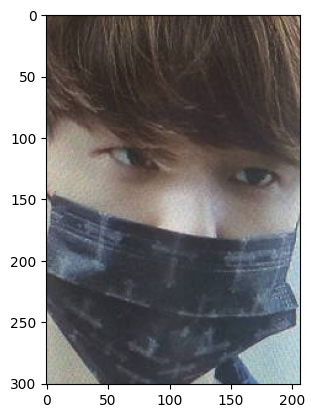

In [14]:
#display with mask image
img=mpimg.imread('/content/data/with_mask/with_mask_69.jpg')
imgplot=plt.imshow(img)
plt.show()

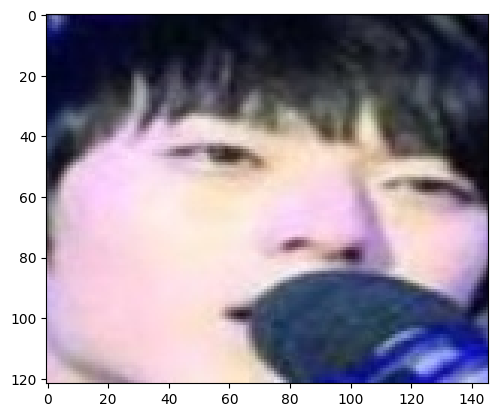

In [15]:
#display without mask image
img=mpimg.imread('/content/data/without_mask/without_mask_69.jpg')
imgplot=plt.imshow(img)
plt.show()

We observe image size is not same

Image Processing

1. Resize the images
2. Convert images to numpy arrays

In [16]:
#Convert images to numpy arrays

with_mask_path='/content/data/with_mask/'

data=[]

for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)


without_mask_path='/content/data/without_mask/'

for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
len(data)

7553

In [18]:
type(data)

list

array([[[51, 43, 54],
        [59, 51, 62],
        [73, 65, 76],
        ...,
        [60, 46, 51],
        [74, 57, 60],
        [79, 63, 66]],

       [[58, 50, 62],
        [75, 67, 77],
        [95, 88, 97],
        ...,
        [51, 38, 42],
        [61, 45, 49],
        [65, 49, 52]],

       [[75, 69, 78],
        [80, 74, 81],
        [85, 79, 86],
        ...,
        [33, 23, 28],
        [46, 34, 38],
        [54, 40, 44]],

       ...,

       [[45, 43, 50],
        [41, 39, 45],
        [36, 33, 40],
        ...,
        [12, 16, 25],
        [12, 15, 24],
        [12, 15, 24]],

       [[46, 45, 51],
        [41, 40, 46],
        [34, 33, 39],
        ...,
        [13, 16, 25],
        [13, 16, 25],
        [13, 16, 25]],

       [[47, 46, 52],
        [41, 40, 46],
        [34, 33, 39],
        ...,
        [14, 17, 26],
        [13, 16, 25],
        [13, 16, 25]]], dtype=uint8)
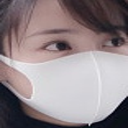

In [19]:
data[0]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
#Converting image list and label list to numpy array

x=np.array(data)
y=np.array(labels)

In [23]:
type(x),type(y)

(numpy.ndarray, numpy.ndarray)

In [24]:
x.shape,y.shape

((7553, 128, 128, 3), (7553,))

Train test split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [26]:
(x.shape,y.shape),(x_train.shape,y_train.shape),(x_test.shape,y_test.shape)

(((7553, 128, 128, 3), (7553,)),
 ((6042, 128, 128, 3), (6042,)),
 ((1511, 128, 128, 3), (1511,)))

In [27]:
#Scaling the data

x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [28]:
x_train_scaled[0]

array([[[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       ...,

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0

Building a Convolutional Neural Network model

In [29]:
import tensorflow as tf
from tensorflow import keras

In [30]:
number_of_classes=2

model=keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(number_of_classes,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
#Compiling
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [32]:
#TRainging the neural network
history=model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - acc: 0.5929 - loss: 0.8468 - val_acc: 0.8711 - val_loss: 0.2841
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - acc: 0.8732 - loss: 0.3272 - val_acc: 0.9041 - val_loss: 0.2302
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - acc: 0.8891 - loss: 0.2765 - val_acc: 0.9240 - val_loss: 0.1945
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9054 - loss: 0.2445 - val_acc: 0.9372 - val_loss: 0.1756
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9183 - loss: 0.1872 - val_acc: 0.9223 - val_loss: 0.2060


MOdel Evaluation

In [33]:
loss,accuracy=model.evaluate(x_test_scaled,y_test)
print('Test Acc',accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.8961 - loss: 0.2914
Test Acc 0.9013898372650146


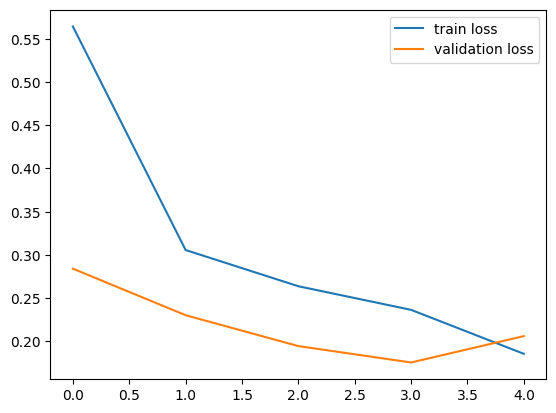

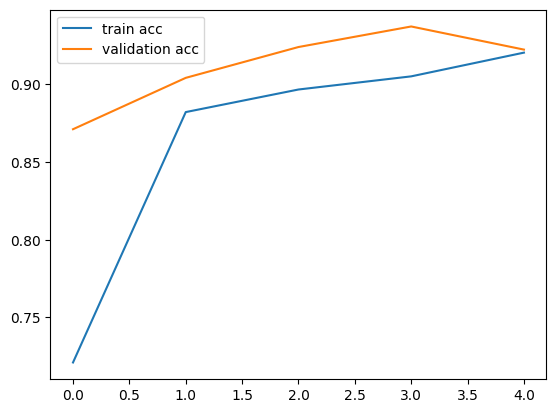

In [34]:
h=history

#plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'],label='train acc')
plt.plot(h.history['val_acc'],label='validation acc')
plt.legend()
plt.show()

Building a predictive System

Path of image of to be predicted/content/close-up-smiling-male-leader-wearing-eyeglasses-and-n95-face-mask.webp


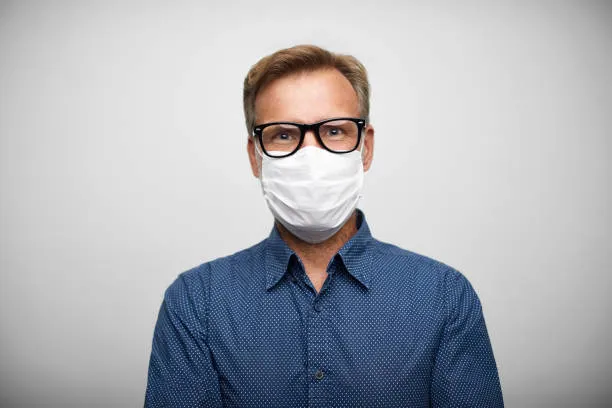

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step
[[0.600131   0.32387114]]
0
The person in the image is wearing mask


In [35]:
input_image_path = input('Path of image of to be predicted')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resized/255

input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])

input_prediction=model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label=np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label==0:
  print('The person in the image is wearing mask')
else:
  print('The person in the image is not wearing mask')

Path of image of to be predicted/content/real-caucasian-man-with-surprised-expression-looking-at-camera.webp


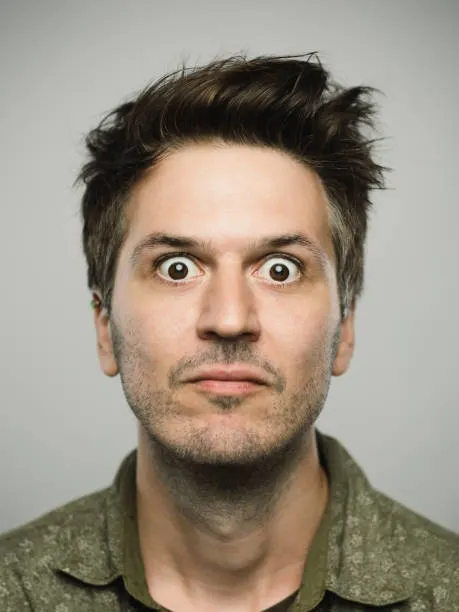

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.16085318 0.75536406]]
1
The person in the image is not wearing mask


In [39]:
input_image_path = input('Path of image of to be predicted')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resized/255

input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])

input_prediction=model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label=np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label==0:
  print('The person in the image is wearing mask')
else:
  print('The person in the image is not wearing mask')